## Questions of Inquiry: ##
1. Which neighborhood has the highest mean airBNB price?
    - Summary Statistics 
    - Visualization
2. Exploring the price difference between the prices of different room types?
    - Visualization
3. What is the relationship between number_of_reviews and price of listing? (using correlation)
    - Transforming Column to Find Z-Score
    - Summary statistics/Correlation Matrix
4. Finding number of listings by borough?
    - Using Value Counts
    - Using visualization
5. Most expensive and least expensive listing overall in terms of minimum expenditure?
    - Creating a new column: Total minimum expense new column = min nights x price of listing
    - Summary Statistics of that column
6. Geo location distribution of the Air BnBs?
    - Visualization
    
Data set was documented in the previous assignment.

### Importing and Clean Up ###

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

bnb_df = pd.read_csv("../data/raw/AB_NYC_2019.csv")

#Keeping only columns relevant to analysis by subsettinng
bnb_df_relevant = bnb_df[['id', 'name','neighbourhood_group','latitude', 'longitude','room_type','price',
                         'minimum_nights', 'number_of_reviews']]

#Removing rows where price = 0 Clean up of data
bnb_df_relevant = bnb_df_relevant.loc[bnb_df_relevant['price']>0]

#Used bnb_df_relevant.info() to check data type of each column. No type conversion is required as they are already appropriate
bnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Imported the data using pandas .read_csv() function. Created a subset of the data that kept the columns relevant to the analysis questions. Since the price column has values of 0 (which suggests the researcher has replaced missing values with 0 as price of a AirBnB listing is >0), using .loc[], only rows that have a price value of over 0 were kept.Used bnb_df_relevant.info() to check data type of each column. No type conversion is required as they are already appropriate.

### 1. Which neighborhood has the highest mean airBNB price? ###

Manhattan Air BnB Prices Summary Statistics
count    21660.000000
mean       196.884903
std        291.386838
min         10.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64

Brooklyn Air BnB Prices Summary Statistics
count    20095.000000
mean       124.438915
std        186.896837
min         10.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

Queens Air BnB Prices Summary Statistics
count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64

Staten Island Air BnB Prices Summary Statistics
count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64

Bronx Air Bn

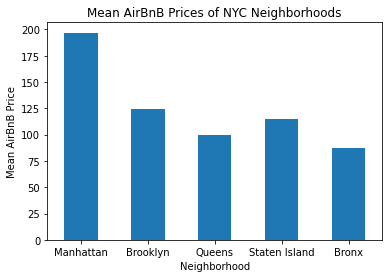

In [16]:
#Subsetting data based on neighborhood

#First finding how many unique neighborhoods there are
bnb_df_relevant['neighbourhood_group'].unique()

#This gives 5 Unique Neighborhoods: 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'
subset_manhattan = bnb_df_relevant.loc[bnb_df_relevant['neighbourhood_group'] == 'Manhattan']
subset_brooklyn = bnb_df_relevant.loc[bnb_df_relevant['neighbourhood_group'] == 'Brooklyn']
subset_queens = bnb_df_relevant.loc[bnb_df_relevant['neighbourhood_group'] == 'Queens']
subset_statisl = bnb_df_relevant.loc[bnb_df_relevant['neighbourhood_group'] == 'Staten Island']
subset_bronx = bnb_df_relevant.loc[bnb_df_relevant['neighbourhood_group'] == 'Bronx']

#Getting summary statistics
print("Manhattan Air BnB Prices Summary Statistics")
print(subset_manhattan['price'].describe())

print()
print("Brooklyn Air BnB Prices Summary Statistics")
print(subset_brooklyn['price'].describe())

print()
print("Queens Air BnB Prices Summary Statistics")
print(subset_queens['price'].describe())

print()
print("Staten Island Air BnB Prices Summary Statistics")
print(subset_statisl['price'].describe())

print()
print("Bronx Air BnB Prices Summary Statistics")
print(subset_bronx['price'].describe())

#Using the mean and plotting it
means_neigh = [subset_manhattan['price'].mean(), subset_brooklyn['price'].mean(), subset_queens['price'].mean(),
               subset_statisl['price'].mean(), subset_bronx['price'].mean()]
means_series = pd.Series(means_neigh, index = ['Manhattan','Brooklyn','Queens', 'Staten Island', 'Bronx'])

#Using matplot lib for visualization
means_series.plot.bar(rot=0)
plt.xlabel("Neighborhood")
plt.ylabel("Mean AirBnB Price")
plt.title("Mean AirBnB Prices of NYC Neighborhoods")
plt.show()

Manhattan has the highest average airBnB price, $196.88, followed by Brooklyn, $124.44, then Staten Island, $144.81, then Queens, $99.52, and lastly Bronx, $87.58.

Data for the 5 boroughs, were subsetted separately using the .loc[] function. It was specified that only observations to be kept were if df['BOROUGH'] == borough respectively and all remaining columns were kept. describe() was used to obtain the summary statistics for each borough. The mean for each borough was added to a list of means and a series was made from this list of means in which the index are the name of boroughs. Then plot.bar() was called on the series to plot the means AirBnB prices by neighborhood.

### 2. Exploring the price difference between the prices of different room types? ###

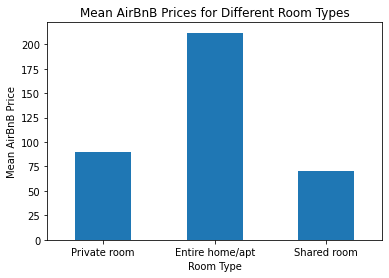

In [21]:
#First finding how many unique room types there are and making it the index
index_roomtyp = bnb_df_relevant['room_type'].unique() 
means_roomtyp = []

#Using a for loop over index to extract mean of prices by room type

for room in index_roomtyp:
    
    #Subsetting data first
    #Then finding mean
    subset_room = bnb_df_relevant.loc[bnb_df_relevant['room_type'] == room]
    means_roomtyp.append(subset_room['price'].mean())

means_series_roomtyp = pd.Series(means_roomtyp, index = index_roomtyp)

#Visualization
means_series_roomtyp.plot.bar(rot=0)
plt.xlabel("Room Type")
plt.ylabel("Mean AirBnB Price")
plt.title("Mean AirBnB Prices for Different Room Types")
plt.show()

The most expensive room type on average is entire home/apt, which from the bar plot looks significantly higher than the other two types. It's more than double of the other room types respectively.

First, I used .unique() to obtain an array of the unique room types. This was assigned to a variable index_roomtyp. A for loop was used to iterate over each room type. Inside the for loop, a temporary subset of the data was created using .loc[] to select just the rows of desired room type. Then, the mean of the price column of these subsets were appended to the empty mean list created before the for loop. A series was then created using the means list and index was set to the index_roomtyp variable. Then plot.bar() was used to plot the mean airBnB prices for the different room types.

### 3. What is the relationship between number_of_reviews and price of listing? ###

In [71]:
#Transforming column to find zscores to filter out outliers
sub_rev_price = bnb_df_relevant[['price','number_of_reviews']].transform(lambda x: abs((x-x.mean())/x.std()))
filter_cond = (sub_rev_price.to_numpy() < 3).all(axis=1)
clean_revprice = bnb_df_relevant[['price','number_of_reviews']][filter_cond]

#Printing out the correlation matrix
print(clean_revprice.corr())

                     price  number_of_reviews
price              1.00000           -0.05163
number_of_reviews -0.05163            1.00000


There is a weak negative correlation, of -0.05163, between price and number of reviews. This means that as price increases the number of reviews decreases and vice versa. This relationship could be because people tend to look at budget friendly places and would usually opt for the cheaper option. Thus, a cheaper place will most probably have more customers, hence more reviews in general.

.transform(lambda x: abs((x-x.mean())/x.std())) was used to find the absolute values of z-scores of the price and number of reviews column. This was done so that outliers can be removed. Then the filter condition was specified where the z-score < 3 (chosen threshold) and .all() was used to produce a list of Boolean values which specify which values to be kept. This filter was then used as an index on the original price and number of reviews column and assigned to a variable, clean_revprice which is a subset of the price and number_of_reviews columns minus the outliers. Then .corr() was used to create a correlation matrix between the two columns.

### 4. Finding number of listings by borough? ###

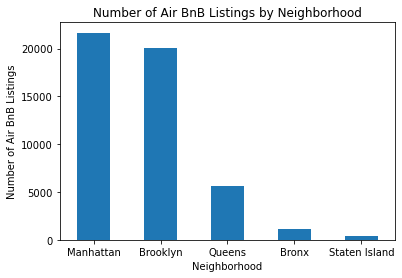

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [3]:
neighborhood_data = bnb_df_relevant['neighbourhood_group'].dropna().value_counts()
neighborhood_data.plot.bar(rot=0)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Air BnB Listings")
plt.title("Number of Air BnB Listings by Neighborhood")
plt.show()

neighborhood_data

Manhattan has the highest number of listings follwed by Brooklyn, Queens, Bronx, and lastly Staten Island.

I isolated the neighborhood_group column using df[column name] syntax. Then .dropna() was used to drop all the NaN values. Then .value_counts() was called on it so that it counts the number of times each borough appears in the data. Value counts automatically sorts the counts in descending order. Then .plot.bar() was used to create a bar graph showing the number of AirBnB Listings by Neighborhood.

### 5. Most expensive and least expensive listing overall in terms of minimum expenditure? ###

In [81]:
#Creating a new column: Total minimum expense new column = min nights x price of listing
bnb_df_relevant['min_total_expense'] = bnb_df_relevant['price'] * bnb_df_relevant['minimum_nights']

#Summary Statistics of new column
bnb_df_relevant['min_total_expense'].describe()

count    4.888400e+04
mean     1.284722e+03
std      1.180588e+04
min      1.000000e+01
25%      1.350000e+02
50%      3.000000e+02
75%      7.350000e+02
max      1.170000e+06
Name: min_total_expense, dtype: float64

From the summary statistics of the column, the most expensive listing is $1170000, and the least expensive listing is $10. The average total minimal expenditure is approximately $1284.72. 

Creating a new column: Total minimum expense new column = min nights x price of listing using the syntax 
df[new column] = df[column1] * df[column2]. Then .describe() was called on this new column to obtain the summary statistics.

### 6. Geo location distribution of the Air BnBs? ###

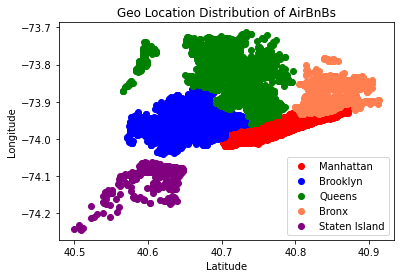

In [83]:
#Plotting the scatter plots
plt.scatter(subset_manhattan['latitude'],subset_manhattan['longitude'], c = 'red', label = "Manhattan")
plt.scatter(subset_brooklyn['latitude'],subset_brooklyn['longitude'],  c = 'blue', label = "Brooklyn")
plt.scatter(subset_queens['latitude'],subset_queens['longitude'], c = 'green', label = "Queens")
plt.scatter(subset_bronx['latitude'],subset_bronx['longitude'], c = 'coral', label = "Bronx")
plt.scatter(subset_statisl['latitude'],subset_statisl['longitude'], c = 'purple', label = "Staten Island")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geo Location Distribution of AirBnBs')
plt.legend()
plt.show()

Shows the density of AirBnBs in each area. Manhattan looks the most dense whil Staten Island looks the least dense.

The data subsetted in part 1 was used in this section. After this the .scatter() function with latitude column as x and longitude column as y was used to plot the data points for each borough. Keyword 'c' was used to specify the colors of the data points and 'label' was used to specify the name of the borough being plotted, which was then shown through the plt.legend() function. X-axis title, Y-axis title and main title were specified using plt.xlabel(), plt.ylabel() and plt.title() respectively.